In [24]:
from sklearn.datasets import load_boston
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
boston = load_boston()

# The column name of the data
columns = boston.feature_names
print('The column name: ', columns)

# Splice data and target
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
print(df.head())

data = df.drop('MEDV', axis = 1)
RM = df[['RM']]
target = df[['MEDV']]

# Divide into training set and testing set
train_RM, test_RM, train_target, test_target = train_test_split(RM, target, test_size=0.2, random_state=0)
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=0)

The column name:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [7]:
# Unary linear regression
unary = linear_model.LinearRegression()
print('Unary linear regression')

# Fit regression model to the training set
unary.fit(train_RM, train_target)

# Apply model to the test set
unary_pred = unary.predict(test_RM)

# slope and intercept
unary_slope = unary.coef_[0][0]
unary_intercept = unary.intercept_[0]
print('RM slope = %.4f' % unary_slope)
print('Intercept = %.4f' % unary_intercept)

# MSE, RMSE and R2 score
unary_MSE = mean_squared_error(test_target, unary_pred)
unary_RMSE = np.sqrt(mean_squared_error(test_target, unary_pred))
unary_R2 = r2_score(test_target, unary_pred)
print('MSE = %.4f' % unary_MSE)
print('RMSE = %.4f' % unary_RMSE)
print('R2 score = %.4f' % unary_R2)

Unary linear regression
Slope = 9.3764
Intercept = -36.4762
MSE = 46.9074
RMSE = 6.8489
R2 score = 0.4239


In [10]:
# Multiple linear regression
multiple = linear_model.LinearRegression()
print('Multiple linear regression')

# Fit regression model to the training set
multiple.fit(train_data, train_target)

# Apply model to the test set
multiple_pred = multiple.predict(test_data)

# slope and intercept
col = data.columns
multiple_slope = multiple.coef_[0]
multiple_intercept = multiple.intercept_[0]
print('''Slope: %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s''' % (multiple_slope[0],col[0],
multiple_slope[1],col[1], multiple_slope[2],col[2], multiple_slope[3],col[3], multiple_slope[4],col[4],
multiple_slope[5],col[5], multiple_slope[6],col[6], multiple_slope[7],col[7], multiple_slope[8],col[8],
multiple_slope[9],col[9], multiple_slope[10],col[10], multiple_slope[11],col[11], multiple_slope[12],col[12]))
print('Intercept = %.4f' % multiple_intercept)

# MSE, RMSE and R2 score
multiple_MSE = mean_squared_error(test_target, multiple_pred)
multiple_RMSE = np.sqrt(mean_squared_error(test_target, multiple_pred))
multiple_R2 = r2_score(test_target, multiple_pred)
print('MSE = %.4f' % multiple_MSE)
print('RMSE = %.4f' % multiple_RMSE)
print('R2 score = %.4f' % multiple_R2)

Multiple linear regression
Slope: -0.1194*CRIM + 0.0448*ZN + 0.0055*INDUS + 2.3408*CHAS + -16.1236*NOX + 3.7087*RM + -0.0031*AGE + -1.3864*DIS + 0.2442*RAD + -0.0110*TAX + -1.0459*PTRATIO + 0.0081*B + -0.4928*LSTAT
Intercept = 38.0917
MSE = 33.4490
RMSE = 5.7835
R2 score = 0.5892


In [19]:
# Ridge regression
ridge = linear_model.RidgeCV(cv=4, alphas=[0.005, 0.01, 0.015, 0.02])
print('Ridge regression')

# Fit regression model to the training set
ridge.fit(train_data, train_target)

# Apply model to the test set
ridge_pred = ridge.predict(test_data)

# alpha, slope and intercept
ridge_alpha = ridge.alpha_
print('selected alpha = %.2f' % ridge_alpha)
col = data.columns
ridge_slope = ridge.coef_[0]
ridge_intercept = ridge.intercept_[0]
print('''Slope: %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s''' % (ridge_slope[0],col[0],
ridge_slope[1],col[1], ridge_slope[2],col[2], ridge_slope[3],col[3], ridge_slope[4],col[4],
ridge_slope[5],col[5], ridge_slope[6],col[6], ridge_slope[7],col[7], ridge_slope[8],col[8],
ridge_slope[9],col[9], ridge_slope[10],col[10], ridge_slope[11],col[11], ridge_slope[12],col[12]))
print('Intercept = %.4f' % ridge_intercept)

# MSE, RMSE and R2 score
ridge_MSE = mean_squared_error(test_target, ridge_pred)
ridge_RMSE = np.sqrt(mean_squared_error(test_target, ridge_pred))
ridge_R2 = r2_score(test_target, ridge_pred)
print('MSE = %.4f' % ridge_MSE)
print('RMSE = %.4f' % ridge_RMSE)
print('R2 score = %.4f' % ridge_R2)

Ridge regression
selected alpha = 0.01
Slope: -0.1194*CRIM + 0.0448*ZN + 0.0052*INDUS + 2.3406*CHAS + -16.0526*NOX + 3.7093*RM + -0.0032*AGE + -1.3854*DIS + 0.2440*RAD + -0.0110*TAX + -1.0452*PTRATIO + 0.0081*B + -0.4928*LSTAT
Intercept = 38.0420
MSE = 33.4540
RMSE = 5.7839
R2 score = 0.5892


In [28]:
# Lasso regression
lasso = linear_model.LassoCV(cv=4, alphas=[0.005, 0.01, 0.015, 0.02])
print('Lasso regression')

# Fit regression model to the training set
lasso.fit(train_data, train_target)

# Apply model to the test set
lasso_pred = lasso.predict(test_data)

# alpha, slope and intercept
lasso_alpha = lasso.alpha_
print('selected alpha = %.2f' % lasso_alpha)
col = data.columns
lasso_slope = lasso.coef_
lasso_intercept = lasso.intercept_
print('''Slope: %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s + %.4f*%s''' % (lasso_slope[0],col[0],
lasso_slope[1],col[1], lasso_slope[2],col[2], lasso_slope[3],col[3], lasso_slope[4],col[4],
lasso_slope[5],col[5], lasso_slope[6],col[6], lasso_slope[7],col[7], lasso_slope[8],col[8],
lasso_slope[9],col[9], lasso_slope[10],col[10], lasso_slope[11],col[11], lasso_slope[12],col[12]))
print('Intercept = %.4f' % lasso_intercept)

# MSE, RMSE and R2 score
lasso_MSE = mean_squared_error(test_target, lasso_pred)
lasso_RMSE = np.sqrt(mean_squared_error(test_target, lasso_pred))
lasso_R2 = r2_score(test_target, lasso_pred)
print('MSE = %.4f' % lasso_MSE)
print('RMSE = %.4f' % lasso_RMSE)
print('R2 score = %.4f' % lasso_R2)

Lasso regression
selected alpha = 0.01
Slope: -0.1187*CRIM + 0.0451*ZN + -0.0008*INDUS + 2.2691*CHAS + -14.3186*NOX + 3.7137*RM + -0.0047*AGE + -1.3585*DIS + 0.2392*RAD + -0.0111*TAX + -1.0279*PTRATIO + 0.0082*B + -0.4949*LSTAT
Intercept = 36.8935
MSE = 33.6078
RMSE = 5.7972
R2 score = 0.5873


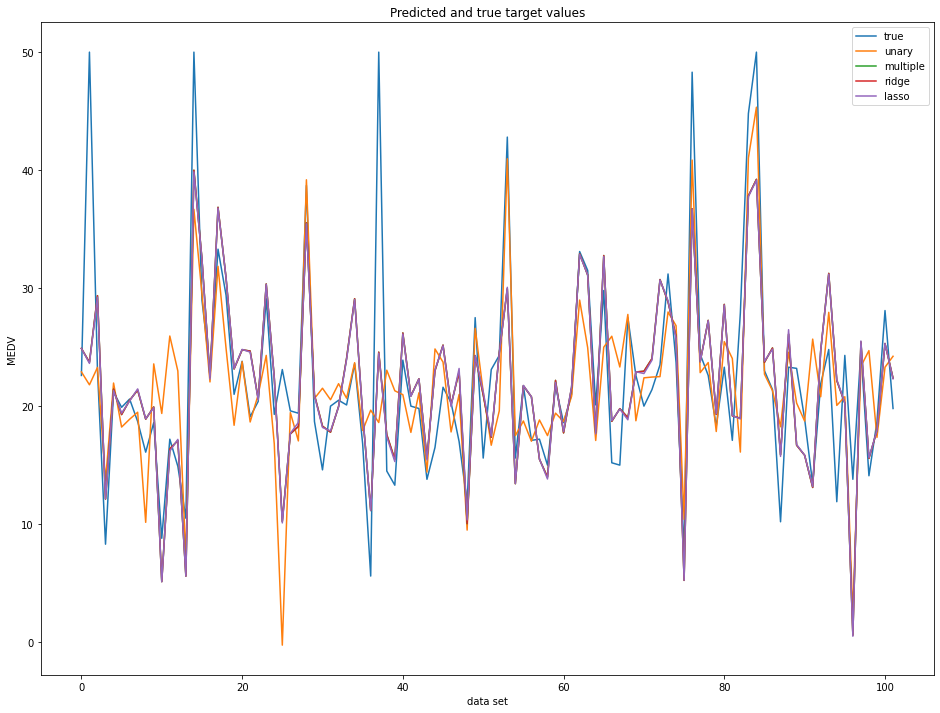

In [44]:
# Plot the predicted and true target values
plt.figure(figsize=[16, 12])
num = test_target.shape[0]
plt.plot(np.linspace(0, num-1, num), test_target.values, label='true')
plt.plot(np.linspace(0, num-1, num), unary_pred, label='unary')
plt.plot(np.linspace(0, num-1, num), multiple_pred, label='multiple')
plt.plot(np.linspace(0, num-1, num), ridge_pred, label='ridge')
plt.plot(np.linspace(0, num-1, num), lasso_pred, label='lasso')
plt.legend()
plt.xlabel('data set')
plt.ylabel('MEDV')
plt.title('Predicted and true target values')
plt.show()